In [384]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [385]:
df=pd.read_csv('DailyDelhiClimateTrain.csv')

In [386]:
df

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...,...
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000


In [387]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


In [388]:
df['date']=pd.to_datetime(df['date'])

In [389]:
df.describe()

,date,meantemp,humidity,wind_speed,meanpressure
count,1462,1462.000000,1462.000000,1462.000000,1462.000000
mean,2015-01-01 12:00:00,25.495521,60.771702,6.802209,1011.104548
min,2013-01-01 00:00:00,6.000000,13.428571,0.000000,-3.041667
25%,2014-01-01 06:00:00,18.857143,50.375000,3.475000,1001.580357
50%,2015-01-01 12:00:00,27.714286,62.625000,6.221667,1008.563492
75%,2016-01-01 18:00:00,31.305804,72.218750,9.238235,1014.944901
max,2017-01-01 00:00:00,38.714286,100.000000,42.220000,7679.333333
std,NaN,7.348103,16.769652,4.561602,180.231668


# Max and Min values for all the Columns

In [390]:
columnss=list(df.columns)
columnss.remove('date')
for i in columnss:
    min_hum = df[df[i] == df[i].min()]
    print(f"Min {i}:\n{min_hum}\n")
    max_hum = df[df[i] == df[i].max()]
    print(f"Max {i}:\n{max_hum}\n")


Min meantemp:
        date  meantemp   humidity  wind_speed  meanpressure
4 2013-01-05       6.0  86.833333         3.7        1016.5

Max meantemp:
          date   meantemp   humidity  wind_speed  meanpressure
144 2013-05-25  38.714286  22.428571   10.314286    998.142857

Min humidity:
          date   meantemp   humidity  wind_speed  meanpressure
856 2015-05-07  35.428571  13.428571   15.342857   1003.571429

Max humidity:
           date  meantemp  humidity  wind_speed  meanpressure
1461 2017-01-01      10.0     100.0         0.0        1016.0

Min wind_speed:
           date   meantemp    humidity  wind_speed  meanpressure
0    2013-01-01  10.000000   84.500000         0.0   1015.666667
15   2013-01-16  13.833333   86.666667         0.0   1016.666667
47   2013-02-17  13.666667   90.000000         0.0   1012.666667
280  2013-10-08  29.200000   69.400000         0.0   1009.800000
288  2013-10-16  26.428571   75.000000         0.0   1009.000000
290  2013-10-18  26.333333   73.166667

In [391]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          1462 non-null   datetime64[ns]
 1   meantemp      1462 non-null   float64       
 2   humidity      1462 non-null   float64       
 3   wind_speed    1462 non-null   float64       
 4   meanpressure  1462 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 57.2 KB


Text(0.5, 1.0, 'date vs meantemp')

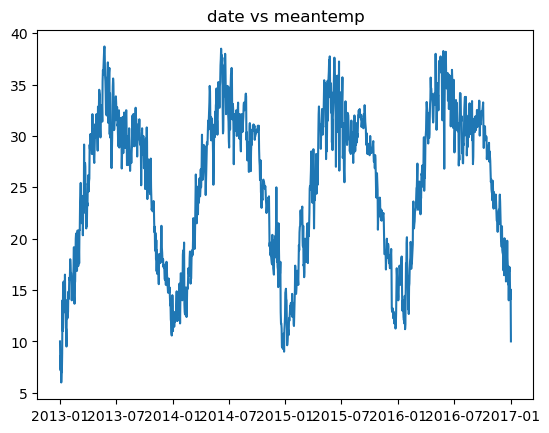

In [392]:

plt.plot(df['date'],df['meantemp'])
plt.title('date vs meantemp')

Text(0.5, 1.0, 'date vs humidity')

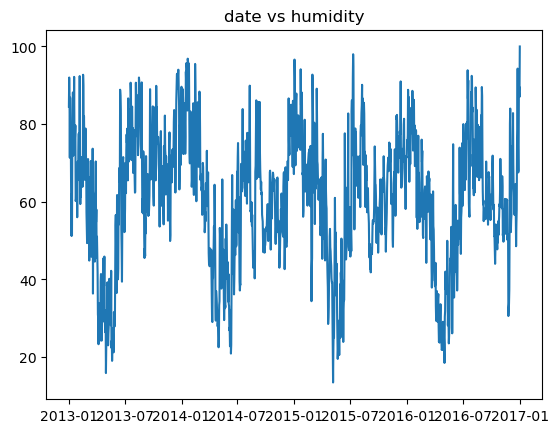

In [393]:
plt.plot(df['date'],df['humidity'])
plt.title('date vs humidity')

Text(0.5, 1.0, 'meantemp vs humidity')

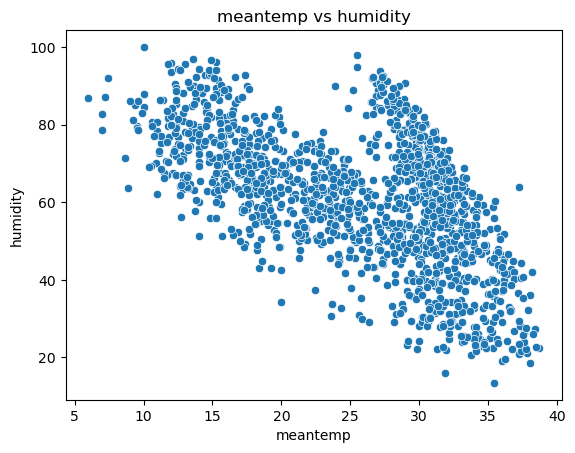

In [394]:
sns.scatterplot(x=df['meantemp'],y=df['humidity'])
plt.plot()
plt.title('meantemp vs humidity')

In [395]:
df['month'] = df['date'].dt.month
df['year']=df['date'].dt.year
df['date']=df['date'].dt.date

Text(0.5, 1.0, 'month vs avgtembymonth')

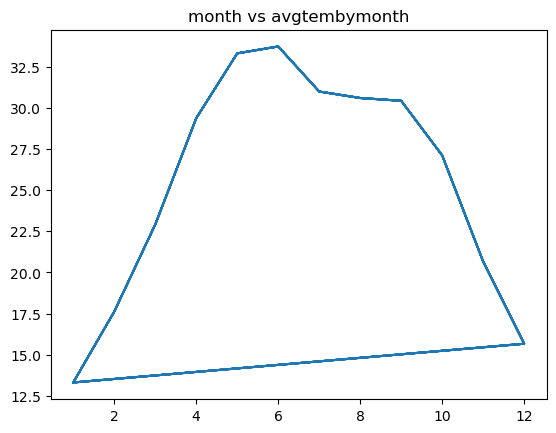

In [396]:
df['avgtembymonth'] = df.groupby('month')['meantemp'].transform('mean')
plt.plot(df['month'],df['avgtembymonth'])
plt.title('month vs avgtembymonth')

In [397]:
x=df.corr(numeric_only=True)
print(x)

               meantemp  humidity  wind_speed  meanpressure     month  \
meantemp       1.000000 -0.571951    0.306468     -0.038818  0.122667   
humidity      -0.571951  1.000000   -0.373972      0.001734  0.074950   
wind_speed     0.306468 -0.373972    1.000000     -0.020670 -0.160668   
meanpressure  -0.038818  0.001734   -0.020670      1.000000 -0.035055   
month          0.122667  0.074950   -0.160668     -0.035055  1.000000   
year           0.103803 -0.071381    0.015642      0.022501 -0.003642   
avgtembymonth  0.934900 -0.469952    0.287340     -0.049572  0.131208   

                   year  avgtembymonth  
meantemp       0.103803       0.934900  
humidity      -0.071381      -0.469952  
wind_speed     0.015642       0.287340  
meanpressure   0.022501      -0.049572  
month         -0.003642       0.131208  
year           1.000000      -0.003760  
avgtembymonth -0.003760       1.000000  


# Humidity and Temp are -vely correlated


<Axes: >

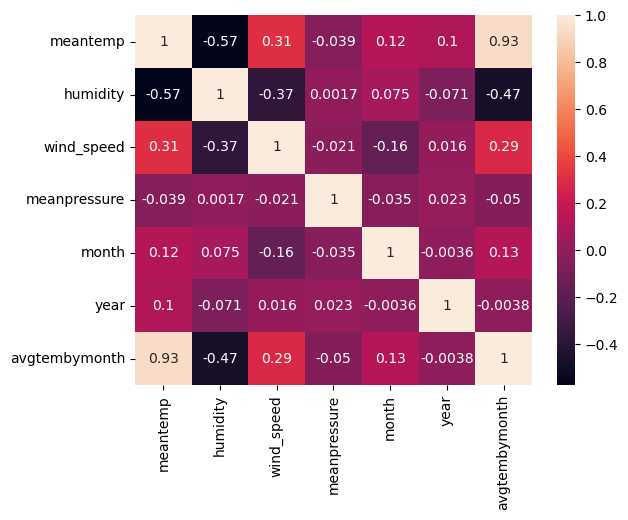

In [398]:
sns.heatmap(x,annot=True)

In [399]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [400]:
LR=LinearRegression()
x=df.drop(columns=['meantemp','date'])
y=df['meantemp']
data=df
print(y)

0       10.000000
1        7.400000
2        7.166667
3        8.666667
4        6.000000
          ...    
1457    17.217391
1458    15.238095
1459    14.095238
1460    15.052632
1461    10.000000
Name: meantemp, Length: 1462, dtype: float64


In [401]:
lr = LinearRegression()
lr.fit(x,y)

LinearRegression()

In [402]:
df_test=pd.read_csv('DailyDelhiClimateTest.csv')

In [403]:
df_test['date']=pd.to_datetime(df_test['date'])

df_test['month'] = df_test['date'].dt.month
df_test['avgtembymonth'] = df_test.groupby('month')['meantemp'].transform('mean')
df_test['year']=df_test['date'].dt.year
df_test['date']=df_test['date'].dt.date



xtest = df_test.drop(columns=['meantemp', 'date'])
ytest = df_test['meantemp']

xtest = xtest[x.columns]

y_pred = lr.predict(xtest)
print("Predictions:\n", y_pred)

r2 = r2_score(ytest, y_pred)
print("R² Score:", r2)


Predictions:
 [15.91462864 16.63873886 16.30488894 17.16089136 16.80391473 16.5027001
 15.31394918 16.18066824 16.38954874 17.03751898 17.02660802 16.83969566
 17.3822729  16.85781026 16.97700987 16.57062975 16.13147331 16.56754416
 16.80988953 17.43818551 17.12746364 16.71815167 16.73779694 17.29663619
 17.17929062 15.61283939 16.68339745 16.25686657 16.33013898 16.61835804
 16.7314767  19.00549313 19.8721122  19.02855957 19.09220749 19.08516096
 19.66305244 20.08639049 19.74076897 19.75312759 19.51064826 20.05821462
 19.59180729 19.84881271 19.95871394 19.79487167 20.59970221 20.04402952
 19.57714517 19.912675   20.34508572 19.68931434 20.56372089 21.61208655
 21.79906947 21.0599049  20.43856213 20.46729082 20.94826142 26.21396372
 25.75571399 26.60804628 26.56544125 26.70532592 26.61824838 26.67608478
 25.87728546 24.6917079  24.79568007 25.3104124  25.58921059 26.11962711
 25.60185967 25.72325229 26.11921516 25.37739545 26.33223569 25.90700668
 25.73711777 26.14394129 26.43510362 2

In [404]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor

In [405]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler

def model_check_with_scale(model, x_train, y_train, x_test, y_test):
    scaler = StandardScaler()
    x_train_scaled = scaler.fit_transform(x_train)
    x_test_scaled = scaler.transform(x_test)
    model.fit(x_train_scaled, y_train)
    y_pred = model.predict(x_test_scaled)
    return r2_score(y_test, y_pred), mean_absolute_error(y_test, y_pred), mean_squared_error(y_test, y_pred)

def model_check(model, x_train, y_train, x_test, y_test):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    return r2_score(y_test, y_pred), mean_absolute_error(y_test, y_pred), mean_squared_error(y_test, y_pred)

In [406]:
r2, mae, mse = model_check(LinearRegression(), x, y, xtest, ytest)
print("LinearRegression,r2, mae, mse",r2, mae, mse)
r2, mae, mse = model_check(DecisionTreeRegressor(), x, y, xtest, ytest)
print("DecisionTreeRegressor,r2, mae, mse",r2, mae, mse)
r2, mae, mse = model_check(Ridge(), x, y, xtest, ytest)
print("Ridge,r2, mae, mse",r2, mae, mse)
r2, mae, mse = model_check(Lasso(), x, y, xtest, ytest)
print("Lasso,r2, mae, mse",r2, mae, mse)

LinearRegression,r2, mae, mse 0.6752318357501725 2.948108713928249 13.021801963721147
DecisionTreeRegressor,r2, mae, mse 0.6555682480837048 3.0661100749851475 13.810226977855356
Ridge,r2, mae, mse 0.6753115544043684 2.947688464393516 13.018605589685684
Lasso,r2, mae, mse 0.7672214505366789 2.5070089707103347 9.333415359585219


In [407]:
r2, mae, mse = model_check_with_scale(LinearRegression(), x, y, xtest, ytest)
print("LinearRegression,r2, mae, mse",r2, mae, mse)
r2, mae, mse = model_check_with_scale(DecisionTreeRegressor(), x, y, xtest, ytest)
print("DecisionTreeRegressor,r2, mae, mse",r2, mae, mse)
r2, mae, mse = model_check_with_scale(Ridge(), x, y, xtest, ytest)
print("Ridge,r2, mae, mse",r2, mae, mse)
r2, mae, mse = model_check_with_scale(Lasso(), x, y, xtest, ytest)
print("Lasso,r2, mae, mse",r2, mae, mse)

LinearRegression,r2, mae, mse 0.675231835750178 2.9481087139282227 13.021801963720925
DecisionTreeRegressor,r2, mae, mse 0.6461514348115065 3.1611554706932057 14.18780055512748
Ridge,r2, mae, mse 0.6752126887522802 2.948364391931514 13.022569675714498
Lasso,r2, mae, mse 0.7602238601512515 2.5431851842963136 9.613988538402642
